In [242]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno

In [243]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 170)

In [244]:
df = pd.read_csv("Data/turkey_car_market.csv")
df.replace("-", np.NaN, inplace = True)
df.replace("Bilmiyorum", np.NaN, inplace = True)
df.head()

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
0,27/05/2020,Jaguar,XF,2.0 D Prestige Plus,2017.0,Dizel,Otomatik Vites,1801-2000 cc,176-200 BG,Lacivert,Hatchback 5 Kapı,Galeriden,2. El,26100,634500
1,16/06/2020,Acura,CL,NaN,2015.0,Dizel,Yarı Otomatik Vites,1301-1600 cc,101-125 BG,Mavi,Sedan,Sahibinden,2. El,127000,151500
2,14/06/2020,Acura,CL,2.2,1994.0,Benzin/LPG,Düz Vites,1301-1600 cc,101-125 BG,Turkuaz,Sedan,Sahibinden,2. El,175000,19750
3,11/06/2020,Acura,CL,NaN,2013.0,Dizel,Düz Vites,1301-1600 cc,76-100 BG,Kahverengi,Sedan,Sahibinden,2. El,325,52000
4,11/06/2020,Acura,CL,2.2,2010.0,Dizel,Otomatik Vites,1801-2000 cc,151-175 BG,Beyaz,Sedan,Sahibinden,2. El,207000,148750


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9044 entries, 0 to 9043
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   İlan Tarihi     9044 non-null   object 
 1   Marka           9044 non-null   object 
 2   Arac Tip Grubu  9044 non-null   object 
 3   Arac Tip        8989 non-null   object 
 4   Model Yıl       9044 non-null   float64
 5   Yakıt Turu      9044 non-null   object 
 6   Vites           9044 non-null   object 
 7   CCM             8935 non-null   object 
 8   Beygir Gucu     3494 non-null   object 
 9   Renk            9044 non-null   object 
 10  Kasa Tipi       9044 non-null   object 
 11  Kimden          9044 non-null   object 
 12  Durum           9044 non-null   object 
 13  Km              9044 non-null   int64  
 14  Fiyat           9044 non-null   int64  
dtypes: float64(1), int64(2), object(12)
memory usage: 1.0+ MB


In [246]:
def check_df(dataframe, head=5):
    print("SHAPE : \n{}".format(dataframe.shape))
    print("-------------------"*3)

    print("TYPES : \n{}".format(dataframe.dtypes))
    print("-------------------"*3)

    print("HEAD : \n{}".format(dataframe.head(head)))
    print("-------------------"*3)

    print("TAIL : \n{}".format(dataframe.tail(head)))
    print("-------------------"*3)

    print("NaN COLUMNS : \n{}".format(df.isnull().any()))
    print("-------------------"*3)

    print("DESCRIBE : \n{}".format(dataframe.describe().T))
check_df(df)

SHAPE : 
(9044, 15)
---------------------------------------------------------
TYPES : 
İlan Tarihi        object
Marka              object
Arac Tip Grubu     object
Arac Tip           object
Model Yıl         float64
Yakıt Turu         object
Vites              object
CCM                object
Beygir Gucu        object
Renk               object
Kasa Tipi          object
Kimden             object
Durum              object
Km                  int64
Fiyat               int64
dtype: object
---------------------------------------------------------
HEAD : 
  İlan Tarihi   Marka Arac Tip Grubu             Arac Tip  Model Yıl  Yakıt Turu                Vites           CCM Beygir Gucu         Renk         Kasa Tipi  \
0  27/05/2020  Jaguar             XF  2.0 D Prestige Plus     2017.0       Dizel       Otomatik Vites  1801-2000 cc  176-200 BG    Lacivert   Hatchback 5 Kapı   
1  16/06/2020   Acura             CL                  NaN     2015.0       Dizel  Yarı Otomatik Vites  1301-1600 cc  10

In [247]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [248]:
missing_values_table(df, True)

             n_miss  ratio
Beygir Gucu    5550  61.37
CCM             109   1.21
Arac Tip         55   0.61


['Arac Tip', 'CCM', 'Beygir Gucu']

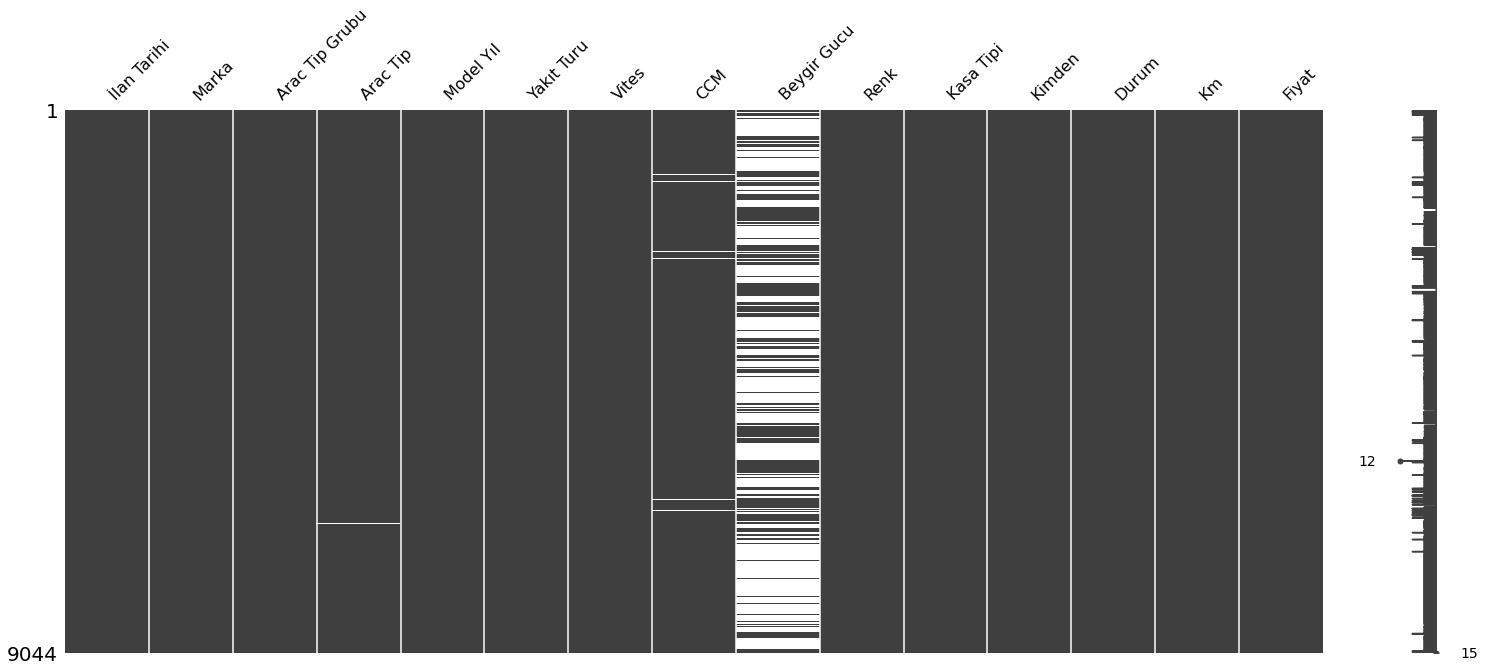

In [249]:
msno.matrix(df);

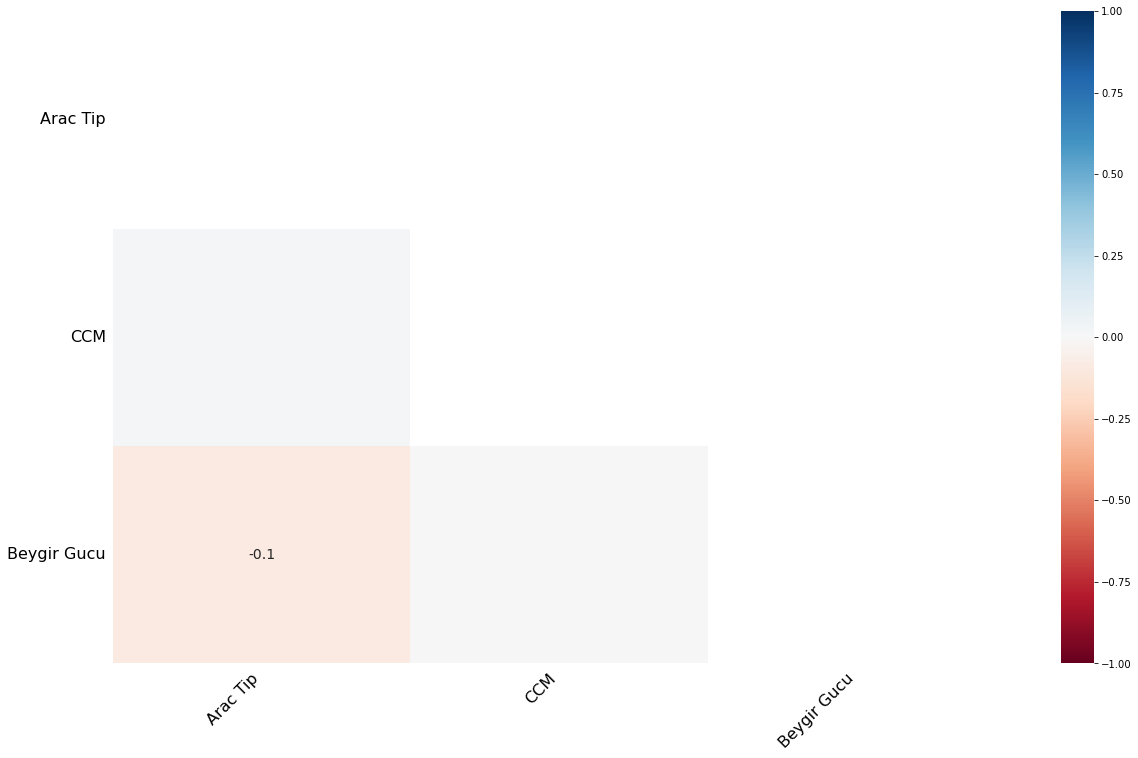

In [250]:
msno.heatmap(df);

In [251]:
df.drop(["Beygir Gucu"], axis = 1, inplace = True)
df.head()

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
0,27/05/2020,Jaguar,XF,2.0 D Prestige Plus,2017.0,Dizel,Otomatik Vites,1801-2000 cc,Lacivert,Hatchback 5 Kapı,Galeriden,2. El,26100,634500
1,16/06/2020,Acura,CL,NaN,2015.0,Dizel,Yarı Otomatik Vites,1301-1600 cc,Mavi,Sedan,Sahibinden,2. El,127000,151500
2,14/06/2020,Acura,CL,2.2,1994.0,Benzin/LPG,Düz Vites,1301-1600 cc,Turkuaz,Sedan,Sahibinden,2. El,175000,19750
3,11/06/2020,Acura,CL,NaN,2013.0,Dizel,Düz Vites,1301-1600 cc,Kahverengi,Sedan,Sahibinden,2. El,325,52000
4,11/06/2020,Acura,CL,2.2,2010.0,Dizel,Otomatik Vites,1801-2000 cc,Beyaz,Sedan,Sahibinden,2. El,207000,148750


In [252]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
    
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    low_limit = quartile1 - 1.5 * interquantile_range
    up_limit = quartile3 + 1.5 * interquantile_range
    return low_limit, up_limit

In [253]:
df.head()

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
0,27/05/2020,Jaguar,XF,2.0 D Prestige Plus,2017.0,Dizel,Otomatik Vites,1801-2000 cc,Lacivert,Hatchback 5 Kapı,Galeriden,2. El,26100,634500
1,16/06/2020,Acura,CL,NaN,2015.0,Dizel,Yarı Otomatik Vites,1301-1600 cc,Mavi,Sedan,Sahibinden,2. El,127000,151500
2,14/06/2020,Acura,CL,2.2,1994.0,Benzin/LPG,Düz Vites,1301-1600 cc,Turkuaz,Sedan,Sahibinden,2. El,175000,19750
3,11/06/2020,Acura,CL,NaN,2013.0,Dizel,Düz Vites,1301-1600 cc,Kahverengi,Sedan,Sahibinden,2. El,325,52000
4,11/06/2020,Acura,CL,2.2,2010.0,Dizel,Otomatik Vites,1801-2000 cc,Beyaz,Sedan,Sahibinden,2. El,207000,148750


In [254]:
df.loc[df["Arac Tip"].isna()].head(10)

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
1,16/06/2020,Acura,CL,NaN,2015.0,Dizel,Yarı Otomatik Vites,1301-1600 cc,Mavi,Sedan,Sahibinden,2. El,127000,151500
3,11/06/2020,Acura,CL,NaN,2013.0,Dizel,Düz Vites,1301-1600 cc,Kahverengi,Sedan,Sahibinden,2. El,325,52000
7,02/06/2020,Acura,CL,NaN,2014.0,Dizel,Düz Vites,1301-1600 cc,Beyaz,Hatchback 5 Kapı,Sahibinden,2. El,79000,82500
10,24/05/2020,Acura,CL,NaN,2001.0,Benzin/LPG,Düz Vites,1301-1600 cc,Siyah,Hatchback 5 Kapı,Sahibinden,2. El,252000,36750
11,08/05/2020,Acura,CL,NaN,2010.0,Dizel,Düz Vites,1300 cc ve altı,Gri,Sedan,Galeriden,2. El,232000,52000
12,07/05/2020,Acura,CL,NaN,2014.0,Dizel,Düz Vites,1301-1600 cc,Siyah,Hatchback 5 Kapı,Sahibinden,2. El,168000,84000
13,27/04/2020,Acura,CL,NaN,2004.0,Dizel,Düz Vites,1301-1600 cc,Beyaz,Hatchback 5 Kapı,Galeriden,2. El,230000,32000
14,27/04/2020,Acura,CL,NaN,2004.0,Benzin/LPG,Düz Vites,1301-1600 cc,Lacivert,Sedan,Sahibinden,2. El,18000,34500
15,24/04/2020,Acura,CL,NaN,2012.0,Dizel,Otomatik Vites,1801-2000 cc,Siyah,Sedan,Galeriden,2. El,249000,235000
16,23/04/2020,Acura,CL,NaN,2017.0,Dizel,Yarı Otomatik Vites,1301-1600 cc,Füme,Hatchback 5 Kapı,Galeriden,2. El,70000,97500


In [255]:
df.loc[df["CCM"].isna()].head(10)

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
22,20/04/2020,Acura,CL,2.2,2012.0,Dizel,Düz Vites,NaN,Gümüş Gri,Arazi Aracı,Galeriden,2. El,270,82500
44,21/03/2020,Acura,TL,Diğer,2016.0,Dizel,Düz Vites,NaN,Beyaz,Sedan,Sahibinden,2. El,172000,92000
64,29/05/2020,Audi,A4,2.0 TDI Quattro,2014.0,Dizel,Otomatik Vites,NaN,Beyaz,Sedan,Galeriden,2. El,283000,225000
68,15/06/2020,Audi,A4,2.0 TDI,2009.0,Dizel,Yarı Otomatik Vites,NaN,Füme,Sedan,Sahibinden,2. El,302000,117500
87,07/06/2020,Audi,A4,2.0 TDI,2013.0,Dizel,Otomatik Vites,NaN,Siyah,Sedan,Galeriden,2. El,315000,175000
462,27/03/2020,Audi,A3,1.6 Attraction,2014.0,Dizel,Otomatik Vites,NaN,Siyah,Hatchback 5 Kapı,Sahibinden,2. El,121500,156500
465,25/03/2020,Audi,A3,1.4 TFSI,2010.0,Benzin,Düz Vites,NaN,Beyaz,Hatchback 3 Kapı,Sahibinden,2. El,99000,95000
468,22/03/2020,Audi,A4,2.0 TDI,2013.0,Dizel,Yarı Otomatik Vites,NaN,Beyaz,Sedan,Sahibinden,2. El,200000,178000
509,07/06/2020,BMW,3 Serisi,3.18ti Compact,1997.0,Benzin/LPG,Düz Vites,NaN,Mavi,Hatchback 3 Kapı,Galeriden,2. El,259000,30000
1052,05/04/2020,BMW,X5,3.0d,2003.0,Dizel,Otomatik Vites,NaN,Gümüş Gri,Arazi Aracı,Sahibinden,2. El,245000,97500


In [256]:
df.loc[df["CCM"].isna() & df["Arac Tip"].isna()].head()

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
5847,10/04/2020,Opel,Astra,NaN,2003.0,Benzin/LPG,Otomatik Vites,NaN,Gri,Sedan,Sahibinden,2. El,273000,44000
6321,25/03/2020,Peugeot,301,NaN,2015.0,Dizel,Düz Vites,NaN,Gri,Sedan,Sahibinden,2. El,84000,72500


In [257]:
delete_index = df.loc[df["CCM"].isna() & df["Arac Tip"].isna()].index
delete_index

Int64Index([5847, 6321], dtype='int64')

In [258]:
df.drop(delete_index, inplace = True)

In [259]:
df.loc[df["CCM"].isna() & df["Arac Tip"].isna()].head()

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat


In [260]:
diger = (df.loc[df["CCM"].isna()]).loc[df["Arac Tip"] == "Diğer"]
diger

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
44,21/03/2020,Acura,TL,Diğer,2016.0,Dizel,Düz Vites,NaN,Beyaz,Sedan,Sahibinden,2. El,172000,92000
2482,27/05/2020,Ford,Diğer,Diğer,2016.0,Dizel,Düz Vites,NaN,Sarı,Hatchback 5 Kapı,Sahibinden,Klasik,10,200000
2916,03/04/2020,Ford,Diğer,Diğer,2015.0,Dizel,Düz Vites,NaN,Beyaz,Diğer,Galeriden,2. El,182,75900
2932,28/03/2020,Ford,Diğer,Diğer,2010.0,Dizel,Düz Vites,NaN,Beyaz,Minivan,Sahibinden,2. El,210674,39000
6074,22/04/2020,Peugeot,208,Diğer,2019.0,Benzin,Düz Vites,NaN,Beyaz,Hatchback 5 Kapı,Sahibinden,2. El,12000,104000
6794,25/05/2020,Renault,11,Diğer,1988.0,Benzin/LPG,Düz Vites,NaN,Mavi,Hatchback 5 Kapı,Sahibinden,2. El,1111111,11950


In [261]:
df.drop(diger.index, inplace = True)

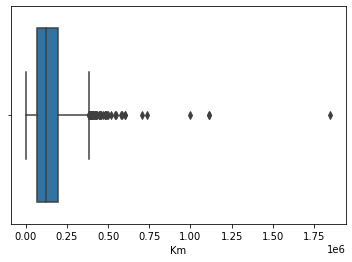

In [262]:
sns.boxplot(x = "Km" ,data = df);

In [263]:
bes_fazla = df[df["Km"] > 500000]
bes_fazla

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
1202,20/03/2020,Chevrolet,Kalos,1.2 S,2006.0,Benzin/LPG,Düz Vites,1300 cc ve altı,Gümüş Gri,Hatchback 5 Kapı,Sahibinden,2. El,1850000,35500
1918,01/05/2020,Fiat,Linea,1.3 Multijet Active Plus\n,2012.0,Dizel,Düz Vites,1301-1600 cc,Siyah,Sedan,Sahibinden,2. El,580000,39999
2022,18/04/2020,Fiat,Albea,Sole 1.3 Multijet Dynamic,2008.0,Dizel,Düz Vites,1300 cc ve altı,Siyah,Sedan,Galeriden,2. El,600000,32000
2331,19/03/2020,Fiat,Albea,NaN,2006.0,Benzin/LPG,Düz Vites,1301-1600 cc,Mavi,Sedan,Galeriden,2. El,585000,19900
2424,06/06/2020,Ford,Focus,1.6 Collection,2005.0,Benzin/LPG,Düz Vites,1301-1600 cc,Gümüş Gri,Sedan,Sahibinden,2. El,708000,39000
3807,13/04/2020,Hyundai,Accent,1.6 Admire,2006.0,Benzin/LPG,Düz Vites,1601-1800 cc,Gümüş Gri,Sedan,Sahibinden,2. El,736000,24500
4312,29/04/2020,Mazda,626,1.6,1990.0,Benzin/LPG,Düz Vites,1301-1600 cc,Mavi,Sedan,Sahibinden,2. El,1111111,16500
4501,18/04/2020,Mercedes,E Serisi,E 290 TD Classic,1998.0,Dizel,Düz Vites,2501-3000 cc,Gümüş Gri,Sedan,Galeriden,2. El,540000,62900
4532,18/04/2020,Mercedes,300,300 E,1985.0,Benzin/LPG,Düz Vites,1300 cc ve altı,Gri,Sedan,Galeriden,2. El,520000,29750
4909,27/03/2020,Mercedes,E,220 CDI Avantgarde,2003.0,Dizel,Otomatik Vites,2001-2500 cc,Siyah,Sedan,Galeriden,2. El,600000,120000


In [264]:
df.drop(bes_fazla.index, inplace = True)

In [265]:
df.loc[df["CCM"].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 22 to 9022
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   İlan Tarihi     101 non-null    object 
 1   Marka           101 non-null    object 
 2   Arac Tip Grubu  101 non-null    object 
 3   Arac Tip        101 non-null    object 
 4   Model Yıl       101 non-null    float64
 5   Yakıt Turu      101 non-null    object 
 6   Vites           101 non-null    object 
 7   CCM             0 non-null      object 
 8   Renk            101 non-null    object 
 9   Kasa Tipi       101 non-null    object 
 10  Kimden          101 non-null    object 
 11  Durum           101 non-null    object 
 12  Km              101 non-null    int64  
 13  Fiyat           101 non-null    int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 11.8+ KB


In [266]:
df_Nccm = df.loc[df["CCM"].isna()]
df_Nccm

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
22,20/04/2020,Acura,CL,2.2,2012.0,Dizel,Düz Vites,NaN,Gümüş Gri,Arazi Aracı,Galeriden,2. El,270,82500
64,29/05/2020,Audi,A4,2.0 TDI Quattro,2014.0,Dizel,Otomatik Vites,NaN,Beyaz,Sedan,Galeriden,2. El,283000,225000
68,15/06/2020,Audi,A4,2.0 TDI,2009.0,Dizel,Yarı Otomatik Vites,NaN,Füme,Sedan,Sahibinden,2. El,302000,117500
87,07/06/2020,Audi,A4,2.0 TDI,2013.0,Dizel,Otomatik Vites,NaN,Siyah,Sedan,Galeriden,2. El,315000,175000
462,27/03/2020,Audi,A3,1.6 Attraction,2014.0,Dizel,Otomatik Vites,NaN,Siyah,Hatchback 5 Kapı,Sahibinden,2. El,121500,156500
465,25/03/2020,Audi,A3,1.4 TFSI,2010.0,Benzin,Düz Vites,NaN,Beyaz,Hatchback 3 Kapı,Sahibinden,2. El,99000,95000
468,22/03/2020,Audi,A4,2.0 TDI,2013.0,Dizel,Yarı Otomatik Vites,NaN,Beyaz,Sedan,Sahibinden,2. El,200000,178000
509,07/06/2020,BMW,3 Serisi,3.18ti Compact,1997.0,Benzin/LPG,Düz Vites,NaN,Mavi,Hatchback 3 Kapı,Galeriden,2. El,259000,30000
1052,05/04/2020,BMW,X5,3.0d,2003.0,Dizel,Otomatik Vites,NaN,Gümüş Gri,Arazi Aracı,Sahibinden,2. El,245000,97500
1088,08/06/2020,Chevrolet,Aveo,1.4\n,2009.0,Benzin/LPG,Düz Vites,NaN,Gri,Sedan,Galeriden,2. El,186000,52000


In [267]:
liste = []
for i in df_Nccm["Arac Tip"].to_list():
    liste.append(i.find("."))
    

In [268]:
liste[:5]

[1, 1, 1, 1, 1]

In [269]:
liste_a = []
for i in df_Nccm["Arac Tip"].to_list():
    if i.find(".") == 1:
        liste_a.append(i[:3])
    else:
        liste_a.append(np.NaN)
    

In [270]:
list_ccm = []
for i in liste_a:
    list_ccm.append(float(i))

In [271]:
set(df["CCM"])

{'1300 cc ve altı',
 '1301-1600 cc',
 '1601-1800 cc',
 '1801-2000 cc',
 '2001-2500 cc',
 '2501-3000 cc',
 '3001-3500 cc',
 '3501-4000 cc',
 '4001-4500 cc',
 '4501-5000 cc',
 '5001-5500 cc',
 '5501-6000 cc',
 '6001 cc ve üzeri',
 nan}

In [272]:
ccm = []
for i in list_ccm:
    if i <= 1.3:
        ccm.append("1300 cc ve altı")
    elif ((i > 1.3) & (i <= 1.6)):
        ccm.append("1301-1600 cc")
    elif ((i > 1.6) & (i<=1.8)):
        ccm.append("1601-1800 cc")
    elif ((i > 1.8) & (i <= 2.0)):
        ccm.append("1801-2000 cc")
    elif ((i > 2.0) & (i <= 2.5)):
        ccm.append("2001-2500 cc")
    elif ((i > 2.0) & (i <= 3.5)):
        ccm.append("3001-3500 cc")
    else:
        ccm.append(np.NaN)

In [273]:
ccm[:5]

['2001-2500 cc',
 '1801-2000 cc',
 '1801-2000 cc',
 '1801-2000 cc',
 '1301-1600 cc']

In [274]:
len(ccm)

101

In [275]:
df_Nccm.index

Int64Index([  22,   64,   68,   87,  462,  465,  468,  509, 1052, 1088,
            ...
            7017, 7033, 7035, 7136, 7150, 8715, 8726, 8979, 9004, 9022], dtype='int64', length=101)

In [276]:
df.loc[df["CCM"].isna(),"CCM"] = ccm

In [277]:
df.loc[df["CCM"].isna()]

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
6416,16/06/2020,Renault,Megane II,Megane II,2005.0,Dizel,Düz Vites,NaN,Bordo,Sedan,Sahibinden,2. El,229000,47900
6429,15/06/2020,Renault,15,15,2009.0,Dizel,Düz Vites,NaN,Beyaz,Sedan,Galeriden,2. El,178000,55000
6522,12/06/2020,Renault,19,R 19 Beymen Club,1997.0,Benzin/LPG,Düz Vites,NaN,Yeşil,Hatchback 5 Kapı,Sahibinden,2. El,253000,23000
6528,12/06/2020,Renault,Megane II,Megane II,2004.0,Benzin/LPG,Düz Vites,NaN,Siyah,Sedan,Galeriden,2. El,260000,47000
6662,05/06/2020,Renault,12,TX,1984.0,Benzin/LPG,Düz Vites,NaN,Mavi,Sedan,Galeriden,2. El,250,15000
6674,04/06/2020,Renault,R 12,SW,1995.0,Benzin/LPG,Düz Vites,NaN,Beyaz,Station Wagon,Galeriden,2. El,11111,24750
6780,28/05/2020,Renault,Broadway,Broadway,1995.0,Benzin/LPG,Düz Vites,NaN,Beyaz,Sedan,Galeriden,2. El,10,15750
6827,20/05/2020,Renault,Megane III,Megane III,2012.0,Dizel,Düz Vites,NaN,Siyah,Hatchback 5 Kapı,Galeriden,2. El,186000,82000
6881,14/05/2020,Renault,9,Spring,1995.0,Benzin/LPG,Düz Vites,NaN,Beyaz,Sedan,Sahibinden,2. El,155200,17000
7017,05/05/2020,Renault,Megane III,Megane III,2011.0,Dizel,Düz Vites,NaN,Gri,Hatchback 5 Kapı,Sahibinden,2. El,300,64500


In [278]:
df.drop(df.loc[df["CCM"].isna()].index, inplace = True)

In [279]:
df.head()

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
0,27/05/2020,Jaguar,XF,2.0 D Prestige Plus,2017.0,Dizel,Otomatik Vites,1801-2000 cc,Lacivert,Hatchback 5 Kapı,Galeriden,2. El,26100,634500
1,16/06/2020,Acura,CL,NaN,2015.0,Dizel,Yarı Otomatik Vites,1301-1600 cc,Mavi,Sedan,Sahibinden,2. El,127000,151500
2,14/06/2020,Acura,CL,2.2,1994.0,Benzin/LPG,Düz Vites,1301-1600 cc,Turkuaz,Sedan,Sahibinden,2. El,175000,19750
3,11/06/2020,Acura,CL,NaN,2013.0,Dizel,Düz Vites,1301-1600 cc,Kahverengi,Sedan,Sahibinden,2. El,325,52000
4,11/06/2020,Acura,CL,2.2,2010.0,Dizel,Otomatik Vites,1801-2000 cc,Beyaz,Sedan,Sahibinden,2. El,207000,148750


<AxesSubplot:>

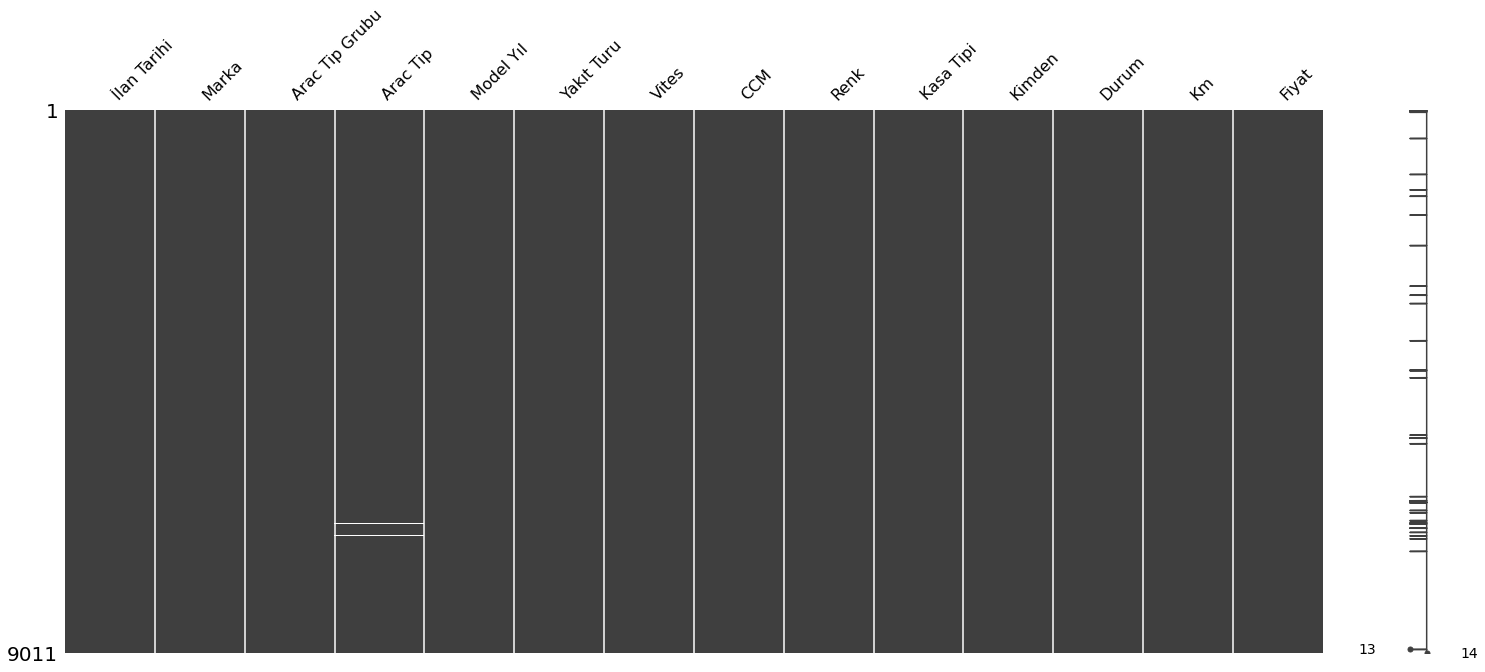

In [280]:
msno.matrix(df)

In [281]:
df.loc[df["Arac Tip"].isna()]

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
1,16/06/2020,Acura,CL,NaN,2015.0,Dizel,Yarı Otomatik Vites,1301-1600 cc,Mavi,Sedan,Sahibinden,2. El,127000,151500
3,11/06/2020,Acura,CL,NaN,2013.0,Dizel,Düz Vites,1301-1600 cc,Kahverengi,Sedan,Sahibinden,2. El,325,52000
7,02/06/2020,Acura,CL,NaN,2014.0,Dizel,Düz Vites,1301-1600 cc,Beyaz,Hatchback 5 Kapı,Sahibinden,2. El,79000,82500
10,24/05/2020,Acura,CL,NaN,2001.0,Benzin/LPG,Düz Vites,1301-1600 cc,Siyah,Hatchback 5 Kapı,Sahibinden,2. El,252000,36750
11,08/05/2020,Acura,CL,NaN,2010.0,Dizel,Düz Vites,1300 cc ve altı,Gri,Sedan,Galeriden,2. El,232000,52000
12,07/05/2020,Acura,CL,NaN,2014.0,Dizel,Düz Vites,1301-1600 cc,Siyah,Hatchback 5 Kapı,Sahibinden,2. El,168000,84000
13,27/04/2020,Acura,CL,NaN,2004.0,Dizel,Düz Vites,1301-1600 cc,Beyaz,Hatchback 5 Kapı,Galeriden,2. El,230000,32000
14,27/04/2020,Acura,CL,NaN,2004.0,Benzin/LPG,Düz Vites,1301-1600 cc,Lacivert,Sedan,Sahibinden,2. El,18000,34500
15,24/04/2020,Acura,CL,NaN,2012.0,Dizel,Otomatik Vites,1801-2000 cc,Siyah,Sedan,Galeriden,2. El,249000,235000
16,23/04/2020,Acura,CL,NaN,2017.0,Dizel,Yarı Otomatik Vites,1301-1600 cc,Füme,Hatchback 5 Kapı,Galeriden,2. El,70000,97500


In [282]:
len(set(df["Arac Tip"]))

1753

In [283]:
len(set(df["Arac Tip Grubu"]))

385

In [284]:
df.head(30)

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
0,27/05/2020,Jaguar,XF,2.0 D Prestige Plus,2017.0,Dizel,Otomatik Vites,1801-2000 cc,Lacivert,Hatchback 5 Kapı,Galeriden,2. El,26100,634500
1,16/06/2020,Acura,CL,NaN,2015.0,Dizel,Yarı Otomatik Vites,1301-1600 cc,Mavi,Sedan,Sahibinden,2. El,127000,151500
2,14/06/2020,Acura,CL,2.2,1994.0,Benzin/LPG,Düz Vites,1301-1600 cc,Turkuaz,Sedan,Sahibinden,2. El,175000,19750
3,11/06/2020,Acura,CL,NaN,2013.0,Dizel,Düz Vites,1301-1600 cc,Kahverengi,Sedan,Sahibinden,2. El,325,52000
4,11/06/2020,Acura,CL,2.2,2010.0,Dizel,Otomatik Vites,1801-2000 cc,Beyaz,Sedan,Sahibinden,2. El,207000,148750
5,04/06/2020,Acura,CL,2.2,1999.0,Dizel,Düz Vites,1801-2000 cc,Lacivert,Roadster,Galeriden,2. El,320000,42500
6,03/06/2020,Acura,CL,2.2,2014.0,Dizel,Otomatik Vites,1301-1600 cc,Kırmızı,Sedan,Galeriden,2. El,183,170000
7,02/06/2020,Acura,CL,NaN,2014.0,Dizel,Düz Vites,1301-1600 cc,Beyaz,Hatchback 5 Kapı,Sahibinden,2. El,79000,82500
8,29/05/2020,Acura,RSX,Type-S,2019.0,Hibrit,Otomatik Vites,1601-1800 cc,Beyaz,Sedan,Yetkili,0 km,15662,189000
9,29/05/2020,Acura,RSX,Type-S,2019.0,Hibrit,Otomatik Vites,1601-1800 cc,Gri,Sedan,Yetkili,0 km,31971,189000


In [285]:
df[df["Marka"] == "Acura"]

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
1,16/06/2020,Acura,CL,NaN,2015.0,Dizel,Yarı Otomatik Vites,1301-1600 cc,Mavi,Sedan,Sahibinden,2. El,127000,151500
2,14/06/2020,Acura,CL,2.2,1994.0,Benzin/LPG,Düz Vites,1301-1600 cc,Turkuaz,Sedan,Sahibinden,2. El,175000,19750
3,11/06/2020,Acura,CL,NaN,2013.0,Dizel,Düz Vites,1301-1600 cc,Kahverengi,Sedan,Sahibinden,2. El,325,52000
4,11/06/2020,Acura,CL,2.2,2010.0,Dizel,Otomatik Vites,1801-2000 cc,Beyaz,Sedan,Sahibinden,2. El,207000,148750
5,04/06/2020,Acura,CL,2.2,1999.0,Dizel,Düz Vites,1801-2000 cc,Lacivert,Roadster,Galeriden,2. El,320000,42500
6,03/06/2020,Acura,CL,2.2,2014.0,Dizel,Otomatik Vites,1301-1600 cc,Kırmızı,Sedan,Galeriden,2. El,183,170000
7,02/06/2020,Acura,CL,NaN,2014.0,Dizel,Düz Vites,1301-1600 cc,Beyaz,Hatchback 5 Kapı,Sahibinden,2. El,79000,82500
8,29/05/2020,Acura,RSX,Type-S,2019.0,Hibrit,Otomatik Vites,1601-1800 cc,Beyaz,Sedan,Yetkili,0 km,15662,189000
9,29/05/2020,Acura,RSX,Type-S,2019.0,Hibrit,Otomatik Vites,1601-1800 cc,Gri,Sedan,Yetkili,0 km,31971,189000
10,24/05/2020,Acura,CL,NaN,2001.0,Benzin/LPG,Düz Vites,1301-1600 cc,Siyah,Hatchback 5 Kapı,Sahibinden,2. El,252000,36750


In [286]:
df.drop(df[df["Marka"] == "Acura"].index, inplace = True) # "Acura marka çıkarıldı"

In [287]:
def grab_col_names(dataframe, cat_th=10, car_th=50):
     # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]

    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 8970
Variables: 14
cat_cols: 8
num_cols: 3
cat_but_car: 3
num_but_cat: 0


In [288]:
cat_but_car # İlan tarihi ve Araç tip çıkarılacak

['İlan Tarihi', 'Arac Tip Grubu', 'Arac Tip']

In [289]:
df.drop(["İlan Tarihi", "Arac Tip"], axis = 1, inplace = True)

In [290]:
df.head()

,Marka,Arac Tip Grubu,Model Yıl,Yakıt Turu,Vites,CCM,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
0,Jaguar,XF,2017.0,Dizel,Otomatik Vites,1801-2000 cc,Lacivert,Hatchback 5 Kapı,Galeriden,2. El,26100,634500
19,Jeep,Wrangler,2014.0,Dizel,Otomatik Vites,2501-3000 cc,Siyah,Arazi Aracı,Galeriden,2. El,54000,457500
39,Hyundai,Tucson,2015.0,Benzin,Otomatik Vites,1301-1600 cc,Beyaz,Arazi Aracı,Galeriden,2. El,75000,160000
45,Hyundai,Tucson,2015.0,Benzin,Otomatik Vites,1301-1600 cc,Beyaz,Arazi Aracı,Galeriden,2. El,75000,160000
46,Alfa Romeo,147,2008.0,Benzin/LPG,Düz Vites,1301-1600 cc,Siyah,Hatchback 5 Kapı,Galeriden,2. El,220000,45000


In [291]:
cat_cols

['Marka', 'Yakıt Turu', 'Vites', 'CCM', 'Renk', 'Kasa Tipi', 'Kimden', 'Durum']

In [292]:
num_cols

['Model Yıl', 'Km', 'Fiyat']

In [293]:
def cat_summary(dataframe, col_name, plot=False):
    print("--------------------" + col_name + "--------------------------")

    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()
        
#for col in cat_cols:
#    cat_summary(df, col, plot = False)

Model Yıl True


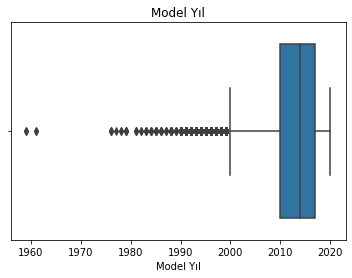

Km True


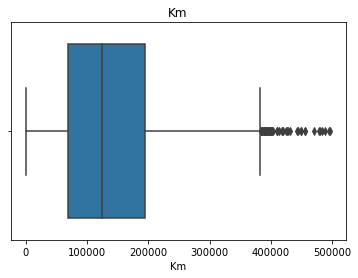

Fiyat True


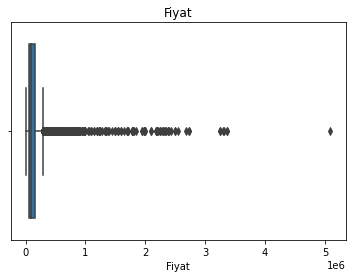

In [294]:
for col in num_cols:
    print(col, check_outlier(df, col))
    sns.boxplot(x=df[col])
    plt.xlabel(col)
    plt.title(col)
    plt.show()

In [295]:
df[((df["Km"] > 500) & (df["Durum"] == "0 km"))].head()

,Marka,Arac Tip Grubu,Model Yıl,Yakıt Turu,Vites,CCM,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
52,Alfa Romeo,156,2016.0,Dizel,Otomatik Vites,1301-1600 cc,Diğer,Diğer,Yetkili,0 km,41128,236750
62,Alfa Romeo,145,2015.0,Benzin,Otomatik Vites,1301-1600 cc,Siyah,Diğer,Yetkili,0 km,104860,343250
502,BMW,X3,2015.0,Benzin,Otomatik Vites,1301-1600 cc,Beyaz,Sedan,Yetkili,0 km,118593,319900
1096,Chevrolet,Aveo,2013.0,Benzin/LPG,Otomatik Vites,1301-1600 cc,Beyaz,Hatchback 3 Kapı,Yetkili,0 km,90214,86900
1209,Citroen,C-Elysee,2015.0,Dizel,Düz Vites,1301-1600 cc,Beyaz,Sedan,Yetkili,0 km,185000,69000


In [296]:
df.loc[((df["Km"] > 500) & (df["Durum"] == "0 km")),"Durum"] = "2. El"

In [297]:
df[((df["Km"] < 30000) & (df["Model Yıl"] <= 2010))].head()

,Marka,Arac Tip Grubu,Model Yıl,Yakıt Turu,Vites,CCM,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
100,Audi,A4,1996.0,Benzin/LPG,Otomatik Vites,1301-1600 cc,Lacivert,Sedan,Galeriden,2. El,100,33500
597,BMW,5 Serisi,1997.0,Benzin/LPG,Düz Vites,1801-2000 cc,Gri,Sedan,Sahibinden,2. El,435,43000
620,BMW,3 Serisi,1997.0,Benzin/LPG,Otomatik Vites,1801-2000 cc,Gri,Sedan,Sahibinden,2. El,287,46000
1656,Fiat,Marea,2006.0,Benzin/LPG,Düz Vites,1301-1600 cc,Gri,Sedan,Galeriden,2. El,238,34500
1669,Fiat,Siena,2000.0,Benzin/LPG,Düz Vites,1301-1600 cc,Beyaz,Sedan,Sahibinden,2. El,235,24500


In [298]:
df["Motor Degisimi"] = 0
df.loc[((df["Km"] < 30000) & (df["Model Yıl"] <= 2010)),"Motor Degisimi"] = 1

In [299]:
df[((df["Km"] < 30) & (df["Model Yıl"] <= 2018))]

,Marka,Arac Tip Grubu,Model Yıl,Yakıt Turu,Vites,CCM,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat,Motor Degisimi
1712,Fiat,Tipo,1997.0,Benzin/LPG,Düz Vites,1301-1600 cc,Mavi,Hatchback 5 Kapı,Sahibinden,2. El,0,15300,1
2318,Fiat,Diğer,1995.0,Benzin/LPG,Düz Vites,1301-1600 cc,Mavi,Hatchback 5 Kapı,Sahibinden,2. El,0,20500,1
2368,Ford,Escort,1995.0,Benzin/LPG,Düz Vites,1801-2000 cc,Bordo,Hatchback 5 Kapı,Galeriden,2. El,11,15500,1
2970,Honda,Civic,2018.0,Benzin/LPG,Otomatik Vites,1301-1600 cc,Gümüş Gri,Sedan,Galeriden,Hasarlı,11,99000,0
3824,Hyundai,Tucson,2018.0,Dizel,Düz Vites,1301-1600 cc,Bej,Arazi Aracı,Sahibinden,0 km,0,222000,0
3938,Jeep,CJ-6,1979.0,Benzin/LPG,Düz Vites,1300 cc ve altı,Gri,Diğer,Galeriden,2. El,0,69950,1
4611,Mercedes,190,1985.0,Dizel,Düz Vites,1801-2000 cc,Kırmızı,Sedan,Galeriden,0 km,0,24500,1
4672,Mercedes,Diğer,1976.0,Benzin,Düz Vites,1300 cc ve altı,Kırmızı,Diğer,Galeriden,2. El,0,107000,1
5026,Nissan,Navara,2008.0,Dizel,Otomatik Vites,2001-2500 cc,Siyah,Arazi Aracı,Galeriden,2. El,0,79750,1
5027,Nissan,Navara,2008.0,Dizel,Otomatik Vites,2001-2500 cc,Siyah,Arazi Aracı,Galeriden,2. El,0,79750,1


In [300]:
df.loc[((10 < df["Km"]) & (df["Km"] < 100) & (df["Model Yıl"] <= 2018) & (df["Model Yıl"] >= 2010)),"Km"] = df.loc[((30 < df["Km"]) & (df["Km"] < 100) & (df["Model Yıl"] <= 2018) & (df["Model Yıl"] >= 2010)),"Km"] *1000

In [301]:
df.loc[((10 < df["Km"]) & (df["Km"] < 100) & (df["Model Yıl"] <= 2018) ),"Km"]

2368    11.0
6483    11.0
6572    12.0
6761    70.0
6984    11.0
7078    11.0
8760    11.0
9005    60.0
9043    11.0
Name: Km, dtype: float64

In [302]:
df.drop(df.loc[((df["Km"] > 10) & (df["Km"] < 100) & (df["Model Yıl"] <= 2018) ),"Km"].index, inplace = True)

In [303]:
df.loc[((df["Km"] <= 10) & (df["Model Yıl"] <= 2018))]

,Marka,Arac Tip Grubu,Model Yıl,Yakıt Turu,Vites,CCM,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat,Motor Degisimi
1712,Fiat,Tipo,1997.0,Benzin/LPG,Düz Vites,1301-1600 cc,Mavi,Hatchback 5 Kapı,Sahibinden,2. El,0.0,15300,1
2318,Fiat,Diğer,1995.0,Benzin/LPG,Düz Vites,1301-1600 cc,Mavi,Hatchback 5 Kapı,Sahibinden,2. El,0.0,20500,1
3824,Hyundai,Tucson,2018.0,Dizel,Düz Vites,1301-1600 cc,Bej,Arazi Aracı,Sahibinden,0 km,0.0,222000,0
3938,Jeep,CJ-6,1979.0,Benzin/LPG,Düz Vites,1300 cc ve altı,Gri,Diğer,Galeriden,2. El,0.0,69950,1
4611,Mercedes,190,1985.0,Dizel,Düz Vites,1801-2000 cc,Kırmızı,Sedan,Galeriden,0 km,0.0,24500,1
4672,Mercedes,Diğer,1976.0,Benzin,Düz Vites,1300 cc ve altı,Kırmızı,Diğer,Galeriden,2. El,0.0,107000,1
5026,Nissan,Navara,2008.0,Dizel,Otomatik Vites,2001-2500 cc,Siyah,Arazi Aracı,Galeriden,2. El,0.0,79750,1
5027,Nissan,Navara,2008.0,Dizel,Otomatik Vites,2001-2500 cc,Siyah,Arazi Aracı,Galeriden,2. El,0.0,79750,1
5929,Peugeot,405,1992.0,Benzin/LPG,Düz Vites,1801-2000 cc,Beyaz,Sedan,Galeriden,2. El,1.0,12750,1
6481,Renault,Toros,1990.0,Benzin/LPG,Düz Vites,1301-1600 cc,Kahverengi,Station Wagon,Galeriden,2. El,1.0,18750,1


In [304]:
df.drop(df.loc[((df["Km"] <= 10) & (df["Model Yıl"] <= 2018))].index, inplace = True)

In [305]:
df.loc[((df["Km"] < 1000) &(df["Km"] > 100)& (df["Model Yıl"] <= 2018))].head()

,Marka,Arac Tip Grubu,Model Yıl,Yakıt Turu,Vites,CCM,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat,Motor Degisimi
597,BMW,5 Serisi,1997.0,Benzin/LPG,Düz Vites,1801-2000 cc,Gri,Sedan,Sahibinden,2. El,435.0,43000,1
620,BMW,3 Serisi,1997.0,Benzin/LPG,Otomatik Vites,1801-2000 cc,Gri,Sedan,Sahibinden,2. El,287.0,46000,1
939,BMW,X3,2011.0,Dizel,Yarı Otomatik Vites,1801-2000 cc,Siyah,Arazi Aracı,Galeriden,2. El,180.0,220900,0
1192,Chevrolet,Aveo,2012.0,Dizel,Düz Vites,1300 cc ve altı,Gümüş Gri,Sedan,Galeriden,2. El,178.0,45500,0
1535,Dacia,Duster,2018.0,Dizel,Düz Vites,1301-1600 cc,Beyaz,Arazi Aracı,Galeriden,2. El,490.0,168000,0


In [306]:
df.loc[((df["Km"] < 1000) &(df["Km"] > 100)& (df["Model Yıl"] <= 2018)), "Km"] = df[((df["Km"] < 1000)&(df["Km"] > 100) & (df["Model Yıl"] <= 2018))]["Km"]*1000

In [307]:
df.loc[((df["Km"] < 1000)&(df["Km"] > 100) & (df["Model Yıl"] <= 2018)), "Km"].index

Int64Index([], dtype='int64')

In [308]:
df[((df["Km"] > 10000) & (df["Model Yıl"] == 2020))]

,Marka,Arac Tip Grubu,Model Yıl,Yakıt Turu,Vites,CCM,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat,Motor Degisimi
5634,Opel,Astra,2020.0,Benzin,Otomatik Vites,1301-1600 cc,Gri,Sedan,Galeriden,2. El,10544.0,144750,0
5635,Opel,Grandland X,2020.0,Dizel,Otomatik Vites,1301-1600 cc,Beyaz,Arazi Aracı,Galeriden,2. El,10016.0,226500,0


In [309]:
df.drop(df[((df["Km"] > 10000) & (df["Model Yıl"] == 2020))].index, inplace = True)

Model Yıl True


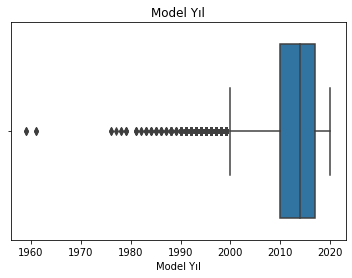

Km True


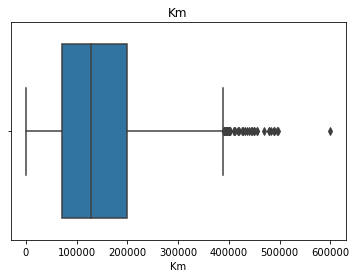

Fiyat True


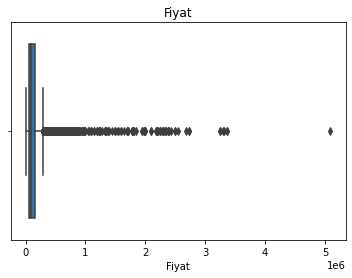

In [310]:
for col in num_cols:
    print(col, check_outlier(df, col))
    sns.boxplot(x=df[col])
    plt.xlabel(col)
    plt.title(col)
    plt.show()

In [311]:
df[((df["Km"] > 200000) & (df["Model Yıl"] > 2018))]

,Marka,Arac Tip Grubu,Model Yıl,Yakıt Turu,Vites,CCM,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat,Motor Degisimi
508,BMW,3 Serisi,2019.0,Benzin/LPG,Otomatik Vites,1801-2000 cc,Siyah,Sedan,Galeriden,2. El,250000.0,57500,0


In [312]:
df.drop(df[((df["Km"] > 200000) & (df["Model Yıl"] > 2018))].index , inplace = True)

In [313]:
df[df["Fiyat"]> 1000000]

,Marka,Arac Tip Grubu,Model Yıl,Yakıt Turu,Vites,CCM,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat,Motor Degisimi
126,Audi,Q8,2020.0,Dizel,Otomatik Vites,3501-4000 cc,Füme,Arazi Aracı,Galeriden,0 km,0.0,2215000,0
242,Audi,RS,2020.0,Benzin,Otomatik Vites,1300 cc ve altı,Siyah,Station Wagon,Galeriden,2. El,250.0,2550000,0
246,Audi,RS,2020.0,Benzin,Otomatik Vites,1300 cc ve altı,Siyah,Station Wagon,Galeriden,0 km,0.0,2500000,0
289,Audi,E-Tron,2020.0,Elektrik,Yarı Otomatik Vites,1300 cc ve altı,Siyah,Arazi Aracı,Galeriden,0 km,0.0,1150000,0
290,Audi,Q8,2020.0,Dizel,Otomatik Vites,2501-3000 cc,Siyah,Arazi Aracı,Galeriden,0 km,0.0,1640000,0
391,Audi,RS Q8,2020.0,Benzin,Otomatik Vites,3501-4000 cc,Beyaz,Arazi Aracı,Galeriden,0 km,0.0,2720000,0
422,Audi,RS Q8,2020.0,Benzin,Otomatik Vites,3501-4000 cc,Füme,Arazi Aracı,Galeriden,0 km,0.0,2680000,0
578,BMW,7 Serisi,2020.0,Benzin,Otomatik Vites,1801-2000 cc,Siyah,Sedan,Galeriden,0 km,0.0,1715000,0
902,BMW,7 Serisi,2015.0,Benzin,Yarı Otomatik Vites,1801-2000 cc,Siyah,Sedan,Galeriden,2. El,36448.0,1195000,0
957,BMW,M Serisi,2014.0,Benzin,Yarı Otomatik Vites,4001-4500 cc,Siyah,Spor / Coupe,Galeriden,2. El,21600.0,1400000,0


In [314]:
df.drop(3478,inplace = True)

<AxesSubplot:>

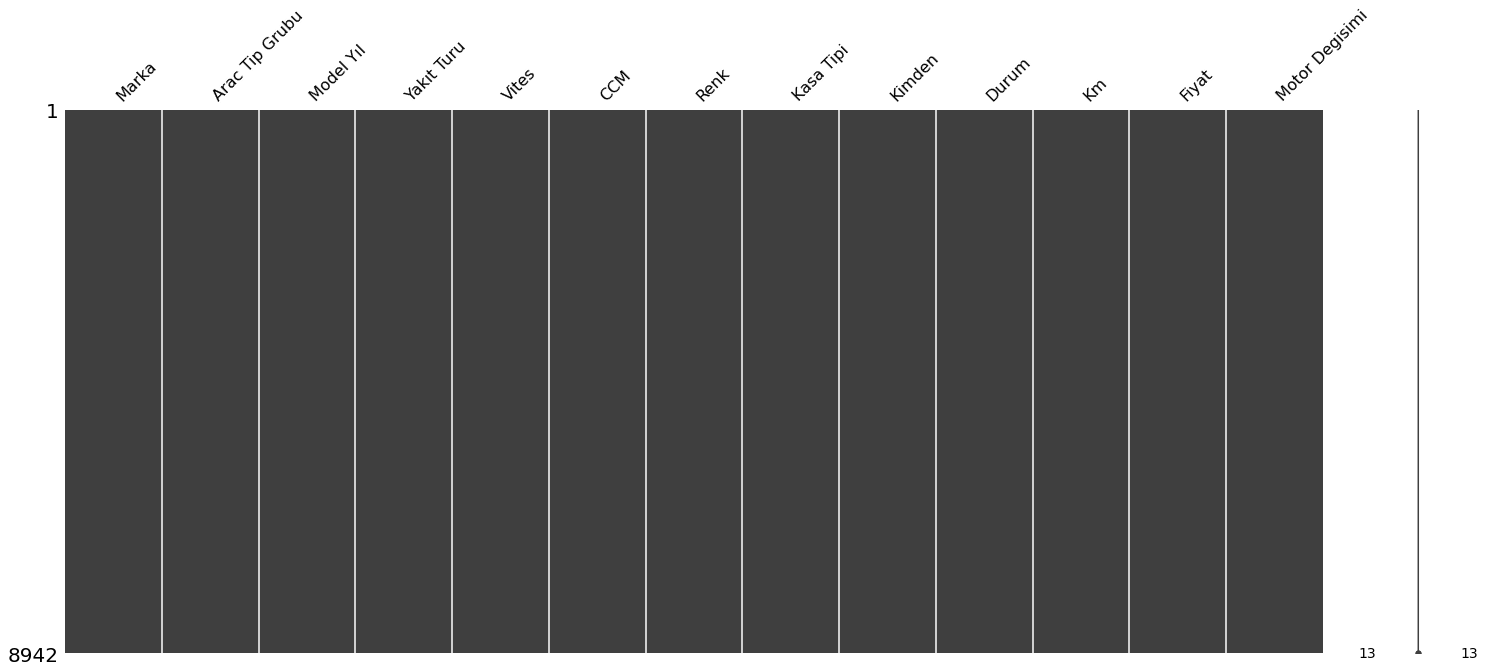

In [346]:
msno.matrix(df)

In [347]:
df.isnull().sum()

Marka             0
Arac Tip Grubu    0
Model Yıl         0
Yakıt Turu        0
Vites             0
CCM               0
Renk              0
Kasa Tipi         0
Kimden            0
Durum             0
Km                0
Fiyat             0
Motor Degisimi    0
dtype: int64

In [344]:
df[df["Km"].isna()]

,Marka,Arac Tip Grubu,Model Yıl,Yakıt Turu,Vites,CCM,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat,Motor Degisimi
2970,Honda,Civic,2018.0,Benzin/LPG,Otomatik Vites,1301-1600 cc,Gümüş Gri,Sedan,Galeriden,Hasarlı,NaN,99000,0
6520,Renault,Fluence,2012.0,Dizel,Düz Vites,1601-1800 cc,Siyah,Sedan,Galeriden,2. El,NaN,75000,0
7293,Renault,Captur,2018.0,Benzin,Düz Vites,1300 cc ve altı,Beyaz,Arazi Aracı,Galeriden,2. El,NaN,131500,0


In [345]:
df.drop(df[df["Km"].isna()].index, inplace = True)

In [348]:
df.to_csv("df_hazır.csv", index = False)